In [1]:
import numpy as np
from numpy.linalg import inv, det
from scipy.stats import multivariate_normal
import math as m

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston, load_diabetes
from sklearn.metrics import mean_squared_error


Bad key "text.kerning_factor" on line 4 in
/Users/kenji/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = load_diabetes()

X = data.data
y = data.target

X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

In [3]:
X_train.shape

(400, 10)

In [4]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
y_mean = y_train.mean()
y_std = y_train.std()

In [5]:
X_train = X_train - X_mean
X_train = X_train / X_std

X_test = X_test - X_mean
X_test = X_test / X_std

y_train = y_train - y_mean
y_train = y_train / y_std

In [6]:
X_test.shape

(42, 10)

In [7]:
def Kernel(x, x_prime):
    theta1 = 1.0462995
    theta2 = 66.40418798
    
    kernel_matrix = np.zeros((x.shape[0], x_prime.shape[0]))
    for i in range(x.shape[0]):
        for j in range(x_prime.shape[0]):
            kernel_matrix[i, j] = theta1 * m.exp(-np.dot(x[i] - x_prime[j], x[i] - x_prime[j]) / theta2)

    return kernel_matrix

def K_diag(x):
    theta1 = 1.04629995
    theta2 = 66.40418798
    
    diag_matrix = np.zeros((x.shape[0], x.shape[0]))
    for i in range(x.shape[0]):
            diag_matrix[i, i] = theta1 * m.exp(-np.dot(x[i] - x[i], x[i] - x[i]) / theta2)
    
    return diag_matrix

In [8]:
theta3 = 0.48637326

K = Kernel(X_train, X_train) + theta3 * np.eye(X_train.shape[0])
k_a = Kernel(X_train, X_test)
k_aa = K_diag(X_test) + theta3 * np.eye(X_test.shape[0])

print(K.shape)
print(k_a.shape)
print(k_aa.shape)

(400, 400)
(400, 42)
(42, 42)


In [9]:
mean = np.dot(k_a.T, inv(K))
mean = np.dot(mean, y_train)

mean = k_a.T.dot(inv(K)).dot(y_train)

In [10]:
y_pred = mean * y_std + y_mean

41.09204628776027


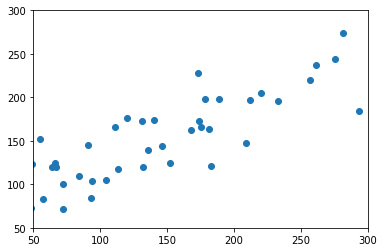

In [11]:
plt.plot(y_test, y_pred, "o")
plt.xlim([50, 300])
plt.ylim([50, 300])

print(m.sqrt(mean_squared_error(y_pred, y_test)))